# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

The way to frame this as a Data problem is to find a model that given a certain number of features, is able to predict the price that a customer
is will ing to pay for a used car. The problem is to idenify which features are have the most significant that price, and which type of model
works best when predicting the price.

Firstly I will import Libraries needed.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

In [2]:
vehicles = pd.read_csv('data/vehicles.csv')

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

#### Look at Data
First I would look at the Data Column headings IE Feature names and Types.

In [3]:
original_len_of_vehicles=len(vehicles)
print(original_len_of_vehicles)

426880


In [4]:
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

Then look at the data itself. Look at the first 10 rows, and the last ten rows, to make sure data is not sorted, and also a random selection

In [5]:
vehicles.head(40)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc
5,7222379453,hudson valley,1600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ny
6,7221952215,hudson valley,1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ny
7,7220195662,hudson valley,15995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ny
8,7209064557,medford-ashland,5000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,or
9,7219485069,erie,3000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pa


In [6]:
vehicles.tail()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
426875,7301591192,wyoming,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,1N4AA6AV6KC367801,fwd,NaN,sedan,NaN,wy
426876,7301591187,wyoming,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,7JR102FKXLG042696,fwd,NaN,sedan,red,wy
426877,7301591147,wyoming,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,1GYFZFR46LF088296,NaN,NaN,hatchback,white,wy
426878,7301591140,wyoming,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,58ABK1GG4JU103853,fwd,NaN,sedan,silver,wy
426879,7301591129,wyoming,30590,2019.0,bmw,4 series 430i gran coupe,good,NaN,gas,22716.0,clean,other,WBA4J1C58KBM14708,rwd,NaN,coupe,NaN,wy


In [7]:
vehicles.sample(n=10)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
180471,7307686299,maine,6450,2009.0,subaru,legacy,excellent,4 cylinders,gas,113804.0,clean,automatic,NaN,4wd,compact,sedan,silver,me
39159,7306471144,modesto,12995,2011.0,ford,e450,NaN,NaN,gas,80000.0,clean,automatic,NaN,NaN,NaN,NaN,NaN,ca
394576,7308409307,norfolk / hampton roads,7990,2009.0,honda,cr-v,NaN,NaN,gas,140662.0,clean,automatic,5J6RE48759L068298,4wd,NaN,SUV,black,va
37970,7311701612,modesto,9495,2016.0,hyundai,sonata 2.4l se,excellent,4 cylinders,gas,58030.0,salvage,automatic,5NPE24AF4GH341943,NaN,NaN,other,NaN,ca
112400,7315532504,south florida,11499,2014.0,bmw,3 series 320i xdrive,excellent,4 cylinders,gas,109327.0,NaN,automatic,WBA3C3C57EF985914,4wd,NaN,sedan,NaN,fl
67383,7312946811,ventura county,8500,2004.0,toyota,tacoma,good,6 cylinders,gas,305000.0,clean,automatic,NaN,4wd,NaN,pickup,silver,ca
148062,7314124527,"st louis, MO",34685,2021.0,gmc,terrain,NaN,NaN,gas,3451.0,clean,automatic,NaN,fwd,NaN,NaN,NaN,il
300169,7307127107,lima / findlay,6950,2010.0,jeep,liberty sport,good,6 cylinders,gas,169467.0,clean,automatic,NaN,4wd,full-size,SUV,black,oh
16383,7311477517,tucson,9795,2014.0,chevrolet,equinox ls,NaN,4 cylinders,gas,141655.0,clean,automatic,NaN,fwd,NaN,SUV,grey,az
270982,7306382995,hudson valley,3985,2009.0,subaru,tribecca,good,6 cylinders,gas,160000.0,clean,automatic,NaN,4wd,mid-size,SUV,grey,ny


### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

#### Repairing the Data
    

Firstly, ID and VIN refer to an individual car, so those features should also be dropped for modelling purposes. Also, region within a state makes the data too granular, which would lead to overfitting, so wll drop that also.

In [8]:
vehicles = vehicles.drop(columns=['id','VIN','region'])
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         426880 non-null  int64  
 1   year          425675 non-null  float64
 2   manufacturer  409234 non-null  object 
 3   model         421603 non-null  object 
 4   condition     252776 non-null  object 
 5   cylinders     249202 non-null  object 
 6   fuel          423867 non-null  object 
 7   odometer      422480 non-null  float64
 8   title_status  418638 non-null  object 
 9   transmission  424324 non-null  object 
 10  drive         296313 non-null  object 
 11  size          120519 non-null  object 
 12  type          334022 non-null  object 
 13  paint_color   296677 non-null  object 
 14  state         426880 non-null  object 
dtypes: float64(2), int64(1), object(12)
memory usage: 48.9+ MB


Next drop all rows where price is zero or NaN, or where the year is NaN, or where Odometer is null or 0,as impossible to judge value of car without the year. Changing format of year to date-time. Also drop column where model is null.

In [9]:
vehicles = vehicles[vehicles['price'].replace(0, np.nan).notna()]
vehicles = vehicles[vehicles['year'].replace(0, np.nan).notna()]
vehicles = vehicles[vehicles['odometer'].replace(0, np.nan).notna()]
vehicles = vehicles[vehicles['model'].replace(0, np.nan).notna()]
vehicles['year'] = vehicles['year'].astype(int)
vehicles['year_datetime'] = pd.to_datetime(vehicles['year'], format='%Y')
vehicles = vehicles.drop(columns=['year'])
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
Index: 384866 entries, 27 to 426879
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   price          384866 non-null  int64         
 1   manufacturer   370094 non-null  object        
 2   model          384866 non-null  object        
 3   condition      238333 non-null  object        
 4   cylinders      228427 non-null  object        
 5   fuel           382774 non-null  object        
 6   odometer       384866 non-null  float64       
 7   title_status   377926 non-null  object        
 8   transmission   383362 non-null  object        
 9   drive          267770 non-null  object        
 10  size           108857 non-null  object        
 11  type           301953 non-null  object        
 12  paint_color    271841 non-null  object        
 13  state          384866 non-null  object        
 14  year_datetime  384866 non-null  datetime64[ns]
dtypes: d

I think there are ways that the some data can be rebuilt or inferred. For example, approximately 14772 rows have no manufacturer, but the model is known. So can be inferred.

In [10]:
vehicles[vehicles['manufacturer'].isna() & vehicles['model'].notna()].count()

price            14772
manufacturer         0
model            14772
condition        10370
cylinders         8086
fuel             14632
odometer         14772
title_status     14634
transmission     14728
drive             8901
size              5032
type              9487
paint_color       9950
state            14772
year_datetime    14772
dtype: int64

In [11]:
vehicles['manufacturer'] = vehicles['manufacturer'].fillna(
    vehicles.groupby('model')['manufacturer'].transform('first')
)

In [12]:
vehicles[vehicles['manufacturer'].isna() & vehicles['model'].notna()].count()

price            14141
manufacturer         0
model            14141
condition         9921
cylinders         7693
fuel             14001
odometer         14141
title_status     14003
transmission     14097
drive             8554
size              4767
type              9146
paint_color       9556
state            14141
year_datetime    14141
dtype: int64

That did not reclaim many rows, approximately 600. So I will drop all rows that still have no manufacturer.

In [13]:
vehicles = vehicles[vehicles['manufacturer'].replace(0, np.nan).notna()]

But I will use same methedology to fill in cylinder value. I will also take the opportunity to convert Cylinder column to Integer.  

In [14]:
vehicles['cylinders'] = vehicles['cylinders'].str.extract(r'(\d+)').astype('float').astype('Int64')

vehicles['cylinders'] = vehicles['cylinders'].fillna(
    vehicles.groupby(['manufacturer', 'model'])['cylinders'].transform('first')
)
vehicles = vehicles[vehicles['cylinders'].replace(0, np.nan).notna()]

As a checkpoint will look at percentage null value in each column. Will put in a definition so can call frequently.

In [15]:
def get_nan_percentage(df):
    nan_percentage = (df.isna().sum() / len(df)) * 100
    nan_percentage_df = nan_percentage.to_frame(name='NaN Percentage').reset_index()
    nan_percentage_df.rename(columns={'index': 'Column'}, inplace=True)
    return nan_percentage_df

# Display the result
print(get_nan_percentage(vehicles))

           Column  NaN Percentage
0           price        0.000000
1    manufacturer        0.000000
2           model        0.000000
3       condition       39.151826
4       cylinders        0.000000
5            fuel        0.423111
6        odometer        0.000000
7    title_status        1.866893
8    transmission        0.410397
9           drive       28.673690
10           size       69.353270
11           type       21.666189
12    paint_color       29.311757
13          state        0.000000
14  year_datetime        0.000000


So looking at this data, it seems ok to drop rows where where fuel, title_status, transmission is NaN. 

In [16]:
vehicles = vehicles[vehicles['fuel'].replace(0, np.nan).notna()]
vehicles = vehicles[vehicles['title_status'].replace(0, np.nan).notna()]
vehicles = vehicles[vehicles['transmission'].replace(0, np.nan).notna()]
print(get_nan_percentage(vehicles))


           Column  NaN Percentage
0           price        0.000000
1    manufacturer        0.000000
2           model        0.000000
3       condition       39.111863
4       cylinders        0.000000
5            fuel        0.000000
6        odometer        0.000000
7    title_status        0.000000
8    transmission        0.000000
9           drive       28.181829
10           size       68.623742
11           type       22.132088
12    paint_color       28.260764
13          state        0.000000
14  year_datetime        0.000000


Looking at paint colour, I would like to drop column, but will only do so if there is little correlation between price and color. An ANOVA test:can tell whether color has signifcant effect on price. If P-Value less than 0.05, then there is a signifcant effect.

In [17]:
from scipy.stats import f_oneway
# Get price distributions for each paint color
groups = [group['price'].dropna() for _, group in vehicles.groupby('paint_color')]
# Run ANOVA test
stat, p_value = f_oneway(*groups)
# Print results
print(f"ANOVA Test p-value: {p_value:.5f}")

ANOVA Test p-value: 0.09656


The P-Value is greater than 0.05, so OK to drop that column.

In [18]:
vehicles = vehicles.drop(columns=['paint_color'])
print(get_nan_percentage(vehicles))

           Column  NaN Percentage
0           price        0.000000
1    manufacturer        0.000000
2           model        0.000000
3       condition       39.111863
4       cylinders        0.000000
5            fuel        0.000000
6        odometer        0.000000
7    title_status        0.000000
8    transmission        0.000000
9           drive       28.181829
10           size       68.623742
11           type       22.132088
12          state        0.000000
13  year_datetime        0.000000


Let's look at range of year. Any car older than 1990 could probably be considered vintage, and is of no interest to a used car salesman. So they should be dropped from model. 

In [19]:
print(vehicles['year_datetime'].unique())
vehicles = vehicles[vehicles['year_datetime'].dt.year >= 1990]
print(vehicles['year_datetime'].unique())
print(vehicles['condition'].unique())
print(get_nan_percentage(vehicles))

<DatetimeArray>
['2014-01-01 00:00:00', '2010-01-01 00:00:00', '2020-01-01 00:00:00',
 '2017-01-01 00:00:00', '2013-01-01 00:00:00', '2012-01-01 00:00:00',
 '2016-01-01 00:00:00', '2019-01-01 00:00:00', '2011-01-01 00:00:00',
 '1992-01-01 00:00:00',
 ...
 '2022-01-01 00:00:00', '1926-01-01 00:00:00', '1938-01-01 00:00:00',
 '1913-01-01 00:00:00', '1943-01-01 00:00:00', '1915-01-01 00:00:00',
 '1905-01-01 00:00:00', '1925-01-01 00:00:00', '1944-01-01 00:00:00',
 '1945-01-01 00:00:00']
Length: 106, dtype: datetime64[ns]
<DatetimeArray>
['2014-01-01 00:00:00', '2010-01-01 00:00:00', '2020-01-01 00:00:00',
 '2017-01-01 00:00:00', '2013-01-01 00:00:00', '2012-01-01 00:00:00',
 '2016-01-01 00:00:00', '2019-01-01 00:00:00', '2011-01-01 00:00:00',
 '1992-01-01 00:00:00', '2018-01-01 00:00:00', '2004-01-01 00:00:00',
 '2015-01-01 00:00:00', '2001-01-01 00:00:00', '2006-01-01 00:00:00',
 '2003-01-01 00:00:00', '2008-01-01 00:00:00', '2007-01-01 00:00:00',
 '2005-01-01 00:00:00', '2009-01-01 00:0

Impossible to drop the condition column, but need to reduce number of NaN. So, I will make assumptions
- Any car whose price less than 2000 should be marked a salvage
- Any car where year is 2022 and price > 10000 should be considered new
- Any car where year is greater than 2018 and price > 10000 should be considered like new
- Any car where year is greater than 2016 and price > 10000 should be considered like excellent
- Some other conditions

In [20]:
vehicles.loc[(vehicles['condition'].isna()) & (vehicles['price'] < 1000), 'condition'] = 'salvage'
vehicles.loc[(vehicles['condition'].isna()) & (vehicles['price'] >= 10000) & (vehicles['year_datetime'].dt.year >= 2022) , 'condition'] = 'new'
vehicles.loc[(vehicles['condition'].isna()) & (vehicles['price'] < 10000) & (vehicles['year_datetime'].dt.year >= 2022) , 'condition'] = 'salvage'
vehicles.loc[(vehicles['condition'].isna()) & (vehicles['price'] >= 10000) & (vehicles['year_datetime'].dt.year >= 2018) , 'condition'] = 'like new'
vehicles.loc[(vehicles['condition'].isna()) & (vehicles['price'] < 10000) & (vehicles['year_datetime'].dt.year >= 2018) , 'condition'] = 'salvage'
vehicles.loc[(vehicles['condition'].isna()) & (vehicles['price'] >= 10000) & (vehicles['year_datetime'].dt.year >= 2014) , 'condition'] = 'excellent'
vehicles.loc[(vehicles['condition'].isna()) & (vehicles['price'] < 20000) & (vehicles['year_datetime'].dt.year >= 2018) , 'condition'] = 'salvage'
vehicles.loc[(vehicles['condition'].isna()) & (vehicles['year_datetime'].dt.year >= 2014) , 'condition'] = 'fair'
vehicles.loc[(vehicles['condition'].isna()) & (vehicles['price'] >= 1000), 'condition'] = 'fair'
print(get_nan_percentage(vehicles))

           Column  NaN Percentage
0           price        0.000000
1    manufacturer        0.000000
2           model        0.000000
3       condition        0.000000
4       cylinders        0.000000
5            fuel        0.000000
6        odometer        0.000000
7    title_status        0.000000
8    transmission        0.000000
9           drive       28.065601
10           size       68.984307
11           type       21.683444
12          state        0.000000
13  year_datetime        0.000000


Finally, for types that are null, if manufacturer and model are known, then type value can be added from other data with same manufacturer and model. Same principle size and drive can be filled in. 

In [21]:
vehicles['type'] = vehicles['type'].fillna(
    vehicles.groupby(['manufacturer', 'model'])['type'].transform('first')
)
vehicles = vehicles[vehicles['type'].replace(0, np.nan).notna()]

vehicles['drive'] = vehicles['drive'].fillna(
    vehicles.groupby(['manufacturer', 'model','type'])['drive'].transform('first')
)
vehicles = vehicles[vehicles['drive'].replace(0, np.nan).notna()]

print(get_nan_percentage(vehicles))

           Column  NaN Percentage
0           price        0.000000
1    manufacturer        0.000000
2           model        0.000000
3       condition        0.000000
4       cylinders        0.000000
5            fuel        0.000000
6        odometer        0.000000
7    title_status        0.000000
8    transmission        0.000000
9           drive        0.000000
10           size       68.032692
11           type        0.000000
12          state        0.000000
13  year_datetime        0.000000


Finally, considering 68 percent of size feature is NaN, and there is rough correlation btween size and type, I am going to drop size column.

In [22]:
vehicles = vehicles.drop(columns=['size'])
print(get_nan_percentage(vehicles))

           Column  NaN Percentage
0           price             0.0
1    manufacturer             0.0
2           model             0.0
3       condition             0.0
4       cylinders             0.0
5            fuel             0.0
6        odometer             0.0
7    title_status             0.0
8    transmission             0.0
9           drive             0.0
10           type             0.0
11          state             0.0
12  year_datetime             0.0


Check to see if there is any outlier data.

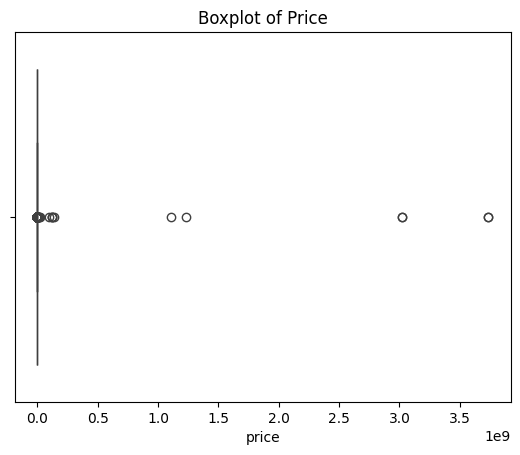

In [23]:
sns.boxplot(x=vehicles['price'])
plt.title('Boxplot of Price')
plt.show()


There is definitely a few outliers which may skew the data. I will delete as outliers any vehicles that is priced over US$300000. As yuu can see below, these are clearly mistakes in the data.And at the other end of scale, I am droping data where 

In [24]:
high_price_vehicles = vehicles[vehicles['price'] > 300000]
vehicles = vehicles[vehicles['price'] <= 300000].reset_index(drop=True)
vehicles = vehicles[~((vehicles['price'] < 1000) & (vehicles['condition'] != 'salvage'))]
print(vehicles[(vehicles['price'] < 1000) & (vehicles['condition'] != 'salvage')])

Empty DataFrame
Columns: [price, manufacturer, model, condition, cylinders, fuel, odometer, title_status, transmission, drive, type, state, year_datetime]
Index: []


In [25]:
print(len(vehicles))
print(len(vehicles)/original_len_of_vehicles)

306673
0.7184056409295352


#### Transform features to make numerical

Need to make the features numerical. Firstly I am goingto make a big call by droping the model feature. I think people tend to buy cars brand and technical specs. Also, manufacturers rarely have 2 different models with the same spec. So the model name is superflouse. This means that by one hot encoding the dataframe, don't create huge amount of columns, one for each model.

In [26]:
vehicles = vehicles.drop(columns=['model'])
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
Index: 306673 entries, 0 to 310014
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   price          306673 non-null  int64         
 1   manufacturer   306673 non-null  object        
 2   condition      306673 non-null  object        
 3   cylinders      306673 non-null  Int64         
 4   fuel           306673 non-null  object        
 5   odometer       306673 non-null  float64       
 6   title_status   306673 non-null  object        
 7   transmission   306673 non-null  object        
 8   drive          306673 non-null  object        
 9   type           306673 non-null  object        
 10  state          306673 non-null  object        
 11  year_datetime  306673 non-null  datetime64[ns]
dtypes: Int64(1), datetime64[ns](1), float64(1), int64(1), object(8)
memory usage: 30.7+ MB


Something else I am going to do is combine groups of states as regions. This will simplifie model somewhat. There is an issue that certain differing car tax policies in each state may affect price, but that may be a problem to deal with later.

In [27]:
state_to_region = {
    'me': 'northeast', 'nh': 'northeast', 'vt': 'northeast', 'ma': 'northeast', 'ri': 'northeast', 'ct': 'northeast',
    'ny': 'northeast', 'pa': 'northeast', 'nj': 'northeast',
    'wi': 'midwest', 'mi': 'midwest', 'il': 'midwest', 'in': 'midwest', 'oh': 'midwest',
    'nd': 'midwest', 'sd': 'midwest', 'ne': 'midwest', 'ks': 'midwest', 'mn': 'midwest', 'mo': 'midwest', 'ia': 'midwest',  
    'de': 'south', 'md': 'south', 'va': 'south', 'wv': 'south', 'nc': 'south', 'sc': 'south',
    'ga': 'south', 'fl': 'south', 'ky': 'south', 'tn': 'south', 'al': 'south', 'ms': 'south',
    'ar': 'south', 'la': 'south', 'ok': 'south', 'tx': 'south', 'dc': 'south',
    'mt': 'west', 'id': 'west', 'wy': 'west', 'co': 'west', 'nm': 'west', 'az': 'west',
    'ut': 'west', 'nv': 'west', 'wa': 'west', 'or': 'west', 'ca': 'west', 'ak': 'west', 'hi': 'west'
}
vehicles['region'] = vehicles['state'].map(state_to_region)
vehicles = vehicles.drop(columns=['state'])
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
Index: 306673 entries, 0 to 310014
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   price          306673 non-null  int64         
 1   manufacturer   306673 non-null  object        
 2   condition      306673 non-null  object        
 3   cylinders      306673 non-null  Int64         
 4   fuel           306673 non-null  object        
 5   odometer       306673 non-null  float64       
 6   title_status   306673 non-null  object        
 7   transmission   306673 non-null  object        
 8   drive          306673 non-null  object        
 9   type           306673 non-null  object        
 10  year_datetime  306673 non-null  datetime64[ns]
 11  region         306673 non-null  object        
dtypes: Int64(1), datetime64[ns](1), float64(1), int64(1), object(8)
memory usage: 30.7+ MB


Penultimate step in preparing the data is to convert from String data to Numerical. Also, I am going to convert year back to Integer format. I will use the one hot dummies feature to do this. Except in case of condition, where I can simply convert ti integers in a ranking system IE 1 for salvage, 2 for fair, 3 for good etc. AT this point, I would like to visualise car types sold broken down by region. 

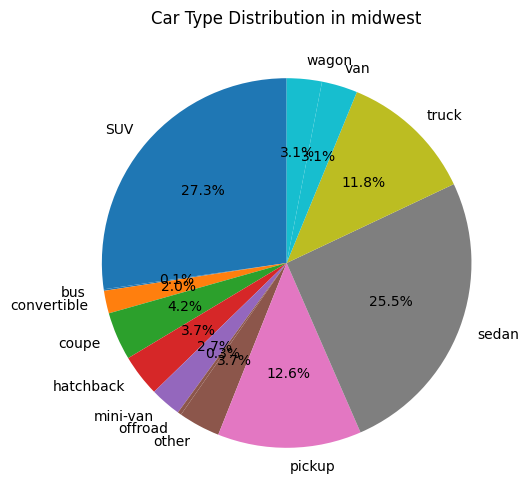

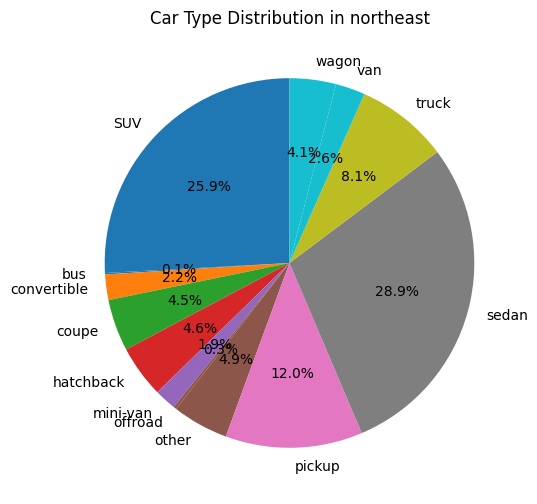

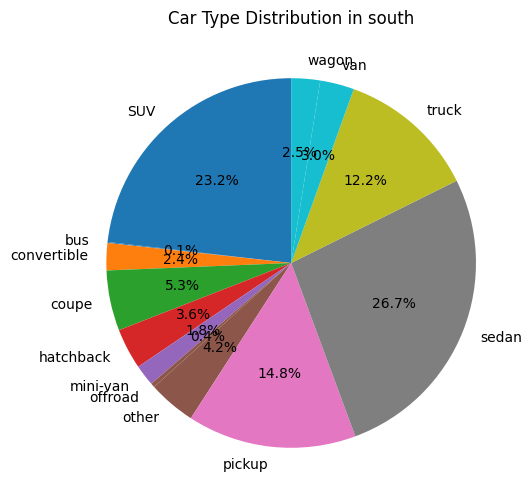

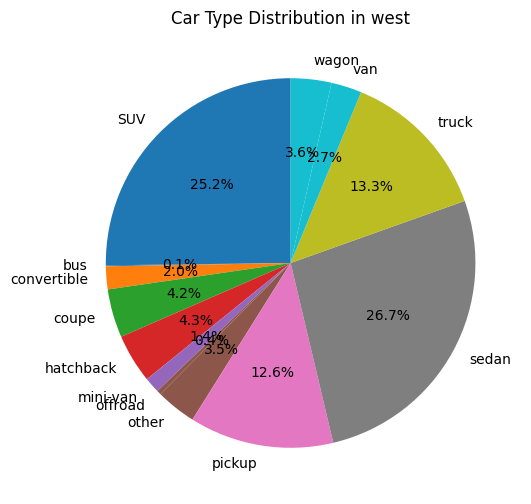

In [28]:
region_type_counts = vehicles.groupby(["region", "type"]).size().unstack()

# Generate a pie chart for each region
for reg in region_type_counts.index:
    plt.figure(figsize=(6, 6))
    region_type_counts.loc[reg].dropna().plot(kind="pie", autopct="%1.1f%%", startangle=90, colormap="tab10")
    plt.title(f"Car Type Distribution in {reg}")
    plt.ylabel("")  # Remove y-axis label for better visualization
    plt.show()

In [29]:
vehicles["condition_rank"] = np.nan
# Assign 1 to rows where condition is 'salvage'
vehicles.loc[vehicles["condition"] == "salvage", "condition_rank"] = 1
vehicles.loc[vehicles["condition"] == "fair", "condition_rank"] = 2
vehicles.loc[vehicles["condition"] == "good", "condition_rank"] = 3
vehicles.loc[vehicles["condition"] == "excellent", "condition_rank"] = 4
vehicles.loc[vehicles["condition"] == "like new", "condition_rank"] = 5
vehicles.loc[vehicles["condition"] == "new", "condition_rank"] = 6
vehicles = vehicles.drop(columns=['condition'])

# Convert to int32 for memory efficiency
vehicles["condition_rank"] = vehicles["condition_rank"].astype(np.int32)
vehicles["cylinders"] = vehicles["cylinders"].astype(np.int32)

# One Hot dummy encoding
vehicles = pd.get_dummies(vehicles, columns=['region', 'manufacturer','fuel','title_status','transmission','drive','type'], drop_first=True)
vehicles['year'] = vehicles['year_datetime'].dt.year
vehicles = vehicles.drop(columns=['year_datetime'])
vehicles.info()
vehicles.head()

<class 'pandas.core.frame.DataFrame'>
Index: 306673 entries, 0 to 310014
Data columns (total 72 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   price                         306673 non-null  int64  
 1   cylinders                     306673 non-null  int32  
 2   odometer                      306673 non-null  float64
 3   condition_rank                306673 non-null  int32  
 4   region_northeast              306673 non-null  bool   
 5   region_south                  306673 non-null  bool   
 6   region_west                   306673 non-null  bool   
 7   manufacturer_alfa-romeo       306673 non-null  bool   
 8   manufacturer_aston-martin     306673 non-null  bool   
 9   manufacturer_audi             306673 non-null  bool   
 10  manufacturer_bmw              306673 non-null  bool   
 11  manufacturer_buick            306673 non-null  bool   
 12  manufacturer_cadillac         306673 non-null  bo

,price,cylinders,odometer,condition_rank,region_northeast,region_south,region_west,manufacturer_alfa-romeo,manufacturer_aston-martin,manufacturer_audi,...,type_hatchback,type_mini-van,type_offroad,type_other,type_pickup,type_sedan,type_truck,type_van,type_wagon,year
0,33590,8,57923.0,3,False,True,False,False,False,False,...,False,False,False,False,True,False,False,False,False,2014
1,22590,8,71229.0,3,False,True,False,False,False,False,...,False,False,False,False,True,False,False,False,False,2010
2,39590,8,19160.0,3,False,True,False,False,False,False,...,False,False,False,False,True,False,False,False,False,2020
3,30990,8,41124.0,3,False,True,False,False,False,False,...,False,False,False,False,True,False,False,False,False,2017
4,15000,6,128000.0,4,False,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,2013


FInally, I will feature scale the data so the large numbers do not have an outsize effect.

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
vehicles[['year', 'odometer', 'cylinders']] = scaler.fit_transform(vehicles[['year', 'odometer', 'cylinders']])

Having already tried to run some models below, I realise that I have was to much data for my laptop to process. So I am going to reduce the data by 80%, taking random sample data.

In [31]:
vehicles = vehicles.sample(frac=0.2, random_state=42)

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

#### SImple LInear Regression
Firstly, we will do a simple linear regression. I will split the data for training 80:20.

In [32]:
from sklearn.model_selection import train_test_split

X = vehicles.drop(columns=['price'])  # Drop target variable
y = vehicles['price']

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Then we will build the model

In [33]:
from sklearn.linear_model import LinearRegression

# Initialize model
lr_model = LinearRegression()

# Train model
lr_model.fit(X_train, y_train)

LinearRegression()

MAE: 5516.133118408978
MSE: 65712815.57153674
RMSE: 8106.344155754599
R² Score: 0.6873915659513674


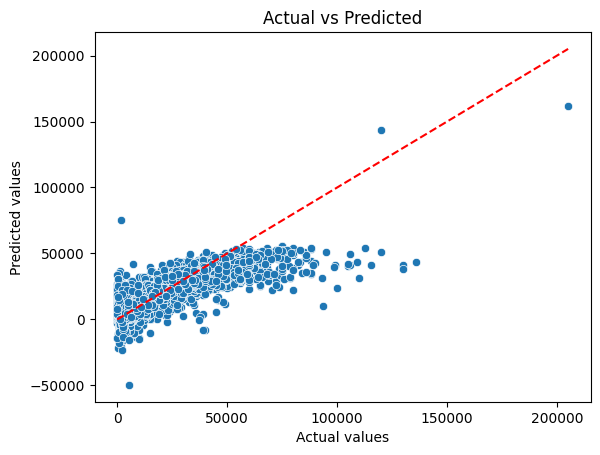

In [34]:
y_pred = lr_model.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")

sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs Predicted')
plt.show()

THis is not a great model, as it seems to fall away in acurracy as prices get above 50K. The R² number you want to be as close to 1 as possible, 0.7 is not good. So will try another model.

#### Polynomial Regression

Will now builld a polynominal model. I will iterate from orders 1 to 5. I will use the same training and test data. I will look at the mean squered error of both the training data and test data to see if there is overfitting, and to se what the best order of polynaominal to use in he model.

Because there is so much data, and my compter power is limited,I am going to do a PCA feature reduction on the dataset, that will preserve 95% of variance.

In [35]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.80)  # Keep enough components to retain 80% variance
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
print(f"Original features: {X_train.shape[1]}, Reduced to: {X_train_pca.shape[1]} after PCA")


Original features: 71, Reduced to: 11 after PCA


In [36]:

import gc
from sklearn.preprocessing import PolynomialFeatures

mse_train_values = []
mse_test_values = []

for k in range(1, 4):  
    poly = PolynomialFeatures(degree=k)  
    X_train_poly = poly.fit_transform(X_train_pca)  
    X_test_poly = poly.transform(X_test_pca)
    # X_train_poly = X_train_poly.astype(np.float32)
    # X_test_poly = X_test_poly.astype(np.float32)

    # Train the model
    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    # Make predictions
    y_pred_train = model.predict(X_train_poly)
    y_pred_test = model.predict(X_test_poly)

    # Compute MSE
    mse_train = mean_squared_error(y_train, y_pred_train)
    mse_train_values.append(mse_train)
   
    mse_test = mean_squared_error(y_test, y_pred_test)
    mse_test_values.append(mse_test)

    #del poly, X_train_poly, X_test_poly, model, y_pred_test, y_pred_train
    #gc.collect()

# Convert MSE values to a NumPy array
mse_array_train = np.array(mse_train_values)
mse_array_test = np.array(mse_test_values)

# Print the MSE array
print(mse_array_train)
print(mse_array_test)

[81992689.00504173 56103940.77105346 43576862.97039662]
[81900191.64699388 58209825.5482395  94384612.80255298]


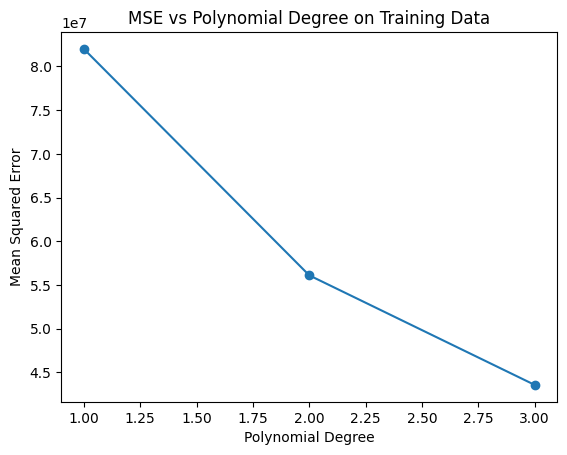

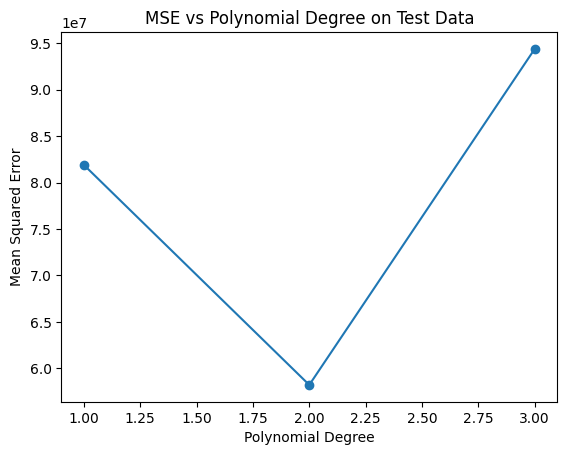

In [37]:


plt.plot(range(1, 4), mse_array_train, marker='o', linestyle='-')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error')
plt.title('MSE vs Polynomial Degree on Training Data')
plt.show()

plt.plot(range(1, 4), mse_array_test, marker='o', linestyle='-')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error')
plt.title('MSE vs Polynomial Degree on Test Data')
plt.show()

#### RIDGE Regression
Now see if I can do a ridge regression on the basic Data.

Mean Squared Error on trian data: 66621363.59
Mean Squared Error on test data: 65701025.10


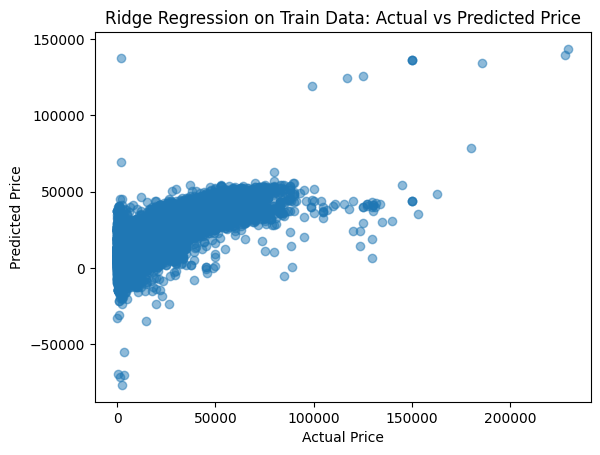

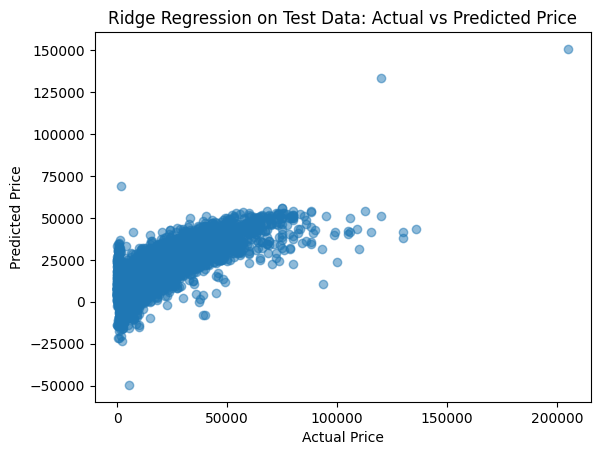

In [38]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=1.0)  # You can tune alpha
ridge_model.fit(X_train, y_train)

#Make predictions
y_pred_train = ridge_model.predict(X_train)
y_pred = ridge_model.predict(X_test)

#Evaluate model performance
mse_train = mean_squared_error(y_train, y_pred_train)
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error on trian data: {mse_train:.2f}")
print(f"Mean Squared Error on test data: {mse:.2f}")

#Plot Actual vs Predicted Prices

plt.scatter(y_train, y_pred_train, alpha=0.5)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Ridge Regression on Train Data: Actual vs Predicted Price")
plt.show()


plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Ridge Regression on Test Data: Actual vs Predicted Price")
plt.show()

Above result is simular to linear regression, which is unsurprising due to the underliying maths when Alpha=1. Lets see what happens when we optimise ALpha.

Best Alpha: 2.154434690031882
Training data Mean Squared Error with best alpha: 66695455.44
Testing data Mean Squared Error with best alpha: 65740841.42


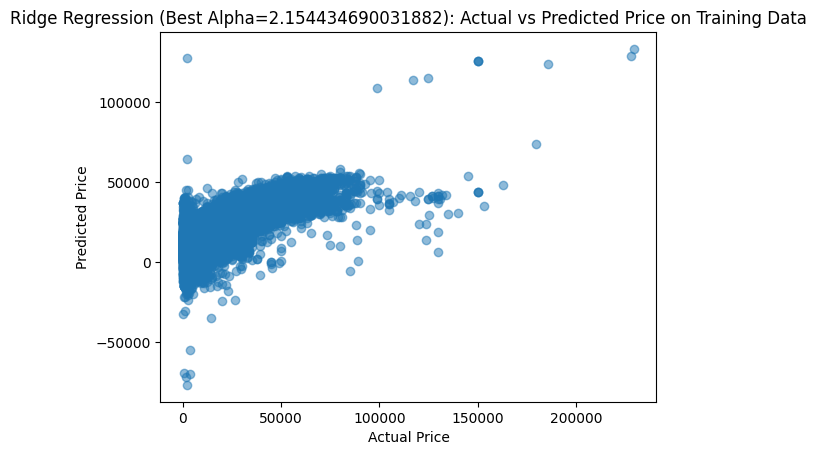

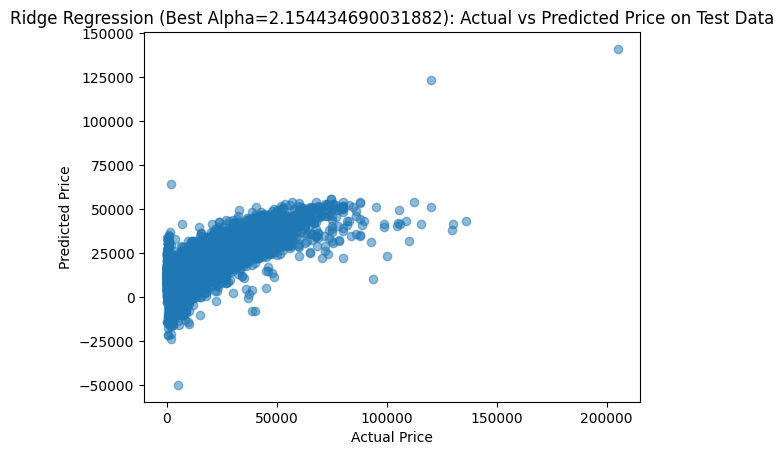

In [39]:
from sklearn.model_selection import GridSearchCV

ridge = Ridge()

# Tune Alpha Using GridSearchCV
alpha_values = np.logspace(-3, 3, 10)  # Try alphas from 0.001 to 1000
param_grid = {'alpha': alpha_values}

grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best alpha
best_alpha = grid_search.best_params_['alpha']
print(f"Best Alpha: {best_alpha}")

# Step 8: Train Ridge Model with Best Alpha
ridge_best = Ridge(alpha=best_alpha)
ridge_best.fit(X_train, y_train)

# Step 9: Make predictions
y_pred_train = ridge_best.predict(X_train)
y_pred = ridge_best.predict(X_test)

# Step 10: Evaluate Model Performance
mse_train = mean_squared_error(y_train, y_pred_train)
mse = mean_squared_error(y_test, y_pred)

print(f"Training data Mean Squared Error with best alpha: {mse_train:.2f}")
print(f"Testing data Mean Squared Error with best alpha: {mse:.2f}")

# Step 11: Plot Actual vs Predicted Prices
plt.scatter(y_train, y_pred_train, alpha=0.5)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(f"Ridge Regression (Best Alpha={best_alpha}): Actual vs Predicted Price on Training Data")
plt.show()

plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(f"Ridge Regression (Best Alpha={best_alpha}): Actual vs Predicted Price on Test Data")
plt.show()

The Ridge Regression model even with optimised alpha does not seem to work any better than linear model. However, I would like to see how it performs on the polynominal data which I made earlier. However, PCA has gave me 11 features, and and doing a polynominal transform of 2 drgrees has given me 364 features. So before doing any more ridge regression, I am going to sequential feature analysis to bring number of features down to 15 and see if this model performs any better

In [40]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import SequentialFeatureSelector

poly = PolynomialFeatures(degree=2)  
X_train_poly = poly.fit_transform(X_train_pca)  
X_test_poly = poly.transform(X_test_pca)

X_combined = np.vstack((X_train_poly, X_test_poly))
y_combined = np.hstack((y_train, y_test))

selector = SequentialFeatureSelector(estimator=LinearRegression(),
                                    n_features_to_select=15,
                                    cv = 5,
                                    scoring = 'neg_mean_squared_error')
X_combined_sfa = selector.fit_transform(X_combined, y_combined)

selected_features = selector.get_support(indices=True)
print("Selected feature indices:", selected_features)

# Get new training and testing sets with only selected features
X_train_sfa = X_train_poly[:, selected_features]
X_test_sfa = X_test_poly[:, selected_features]

Selected feature indices: [ 1  2  3  4  5  6  8 10 12 13 23 26 32 72 75]


Best Alpha: 10.0
Training data Mean Squared Error with best alpha: 67686373.63
Testing data Mean Squared Error with best alpha: 67254331.37


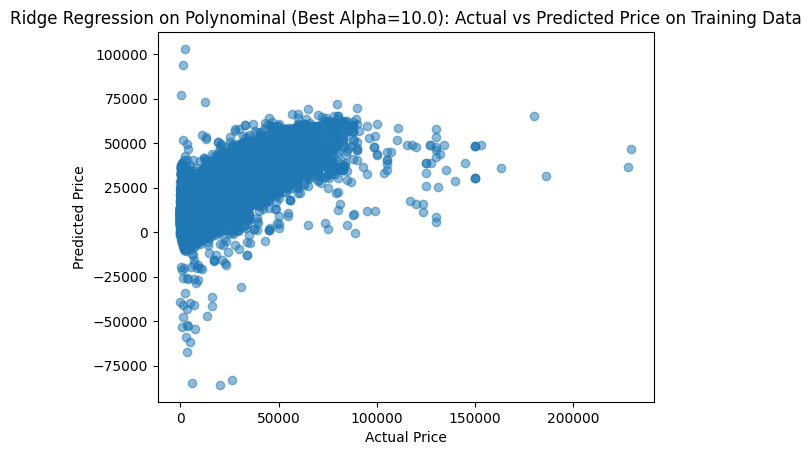

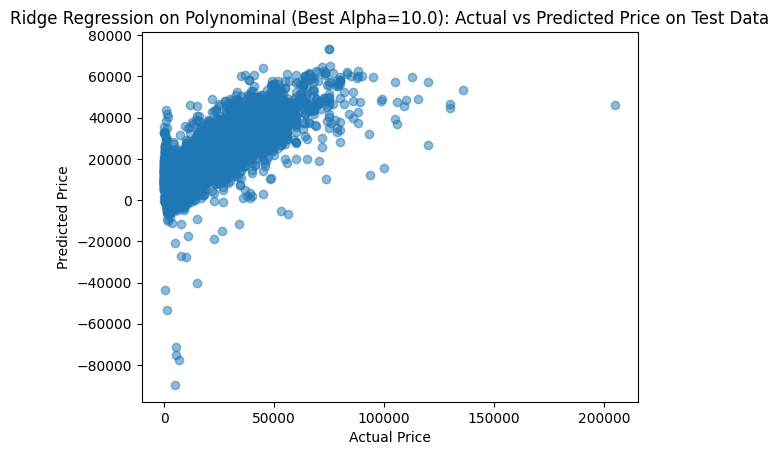

In [41]:
from sklearn.model_selection import GridSearchCV

ridge = Ridge()

# Tune Alpha Using GridSearchCV
alpha_values = np.logspace(-3, 3, 10)  # Try alphas from 0.001 to 1000
param_grid = {'alpha': alpha_values}

grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train_sfa, y_train)

# Get the best alpha
best_alpha = grid_search.best_params_['alpha']
print(f"Best Alpha: {best_alpha}")

# Step 8: Train Ridge Model with Best Alpha
ridge_best = Ridge(alpha=best_alpha)
ridge_best.fit(X_train_sfa, y_train)

# Step 9: Make predictions
y_pred_train = ridge_best.predict(X_train_sfa)
y_pred = ridge_best.predict(X_test_sfa)

# Step 10: Evaluate Model Performance
mse_train = mean_squared_error(y_train, y_pred_train)
mse = mean_squared_error(y_test, y_pred)

print(f"Training data Mean Squared Error with best alpha: {mse_train:.2f}")
print(f"Testing data Mean Squared Error with best alpha: {mse:.2f}")

# Step 11: Plot Actual vs Predicted Prices
plt.scatter(y_train, y_pred_train, alpha=0.5)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(f"Ridge Regression on Polynominal (Best Alpha={best_alpha}): Actual vs Predicted Price on Training Data")
plt.show()

plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(f"Ridge Regression on Polynominal (Best Alpha={best_alpha}): Actual vs Predicted Price on Test Data")
plt.show()

Training data Mean Squared Error with best alpha:  66328596.86. Testing data Mean Squared Error with best alpha: 65742665.29. THis means the RIdge model does not seem much better that the linear model.

#### Lasso Regression

I am going to do this on the data that has not been transformed to Polynominal as my computer does not have power to process. However I will optimise Alpha and see result.

Best Alpha: 2.154434690031882
Mean Squared Error on Training data: 66739171.58
Mean Squared Error on Test data: 65667587.13
manufacturer_ferrari         105322.359552
manufacturer_aston-martin     14870.709860
fuel_hybrid                   11909.521535
fuel_gas                      11836.972024
manufacturer_porsche          11071.487498
dtype: float64


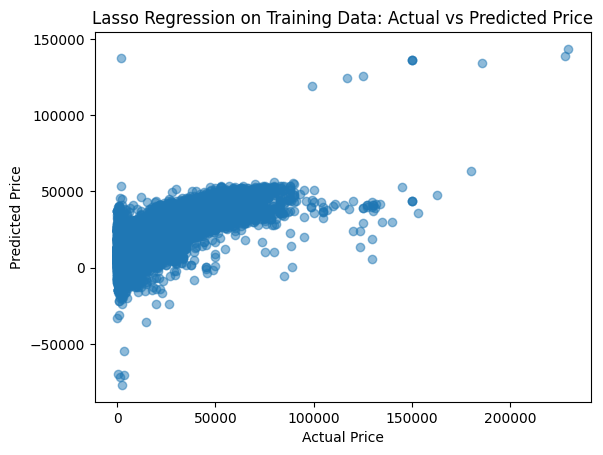

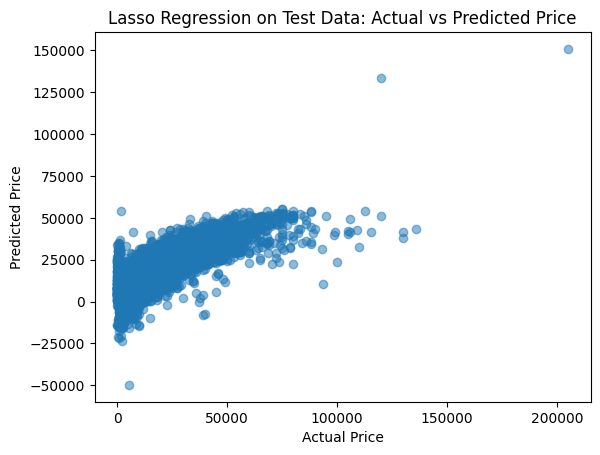

In [42]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

lasso=Lasso()

#Tune Alpha Using GridSearchCV
alpha_values = np.logspace(-3, 3, 10)  # Try alphas from 0.001 to 1000
param_grid = {'alpha': alpha_values}

grid_search = GridSearchCV(lasso, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best alpha
best_alpha = grid_search.best_params_['alpha']
print(f"Best Alpha: {best_alpha}")

Lasso_model = Lasso(alpha=best_alpha)  # You can tune alpha
Lasso_model.fit(X_train, y_train)

#Make predictions
y_pred_train = Lasso_model.predict(X_train)
y_pred = Lasso_model.predict(X_test)

#Evaluate model performance
mse_train = mean_squared_error(y_train, y_pred_train)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error on Training data: {mse_train:.2f}")
print(f"Mean Squared Error on Test data: {mse:.2f}")

lasso_coefficients = pd.Series(Lasso_model.coef_, index=X.columns)
top_5_features = lasso_coefficients.abs().nlargest(5)
print(top_5_features)

#Plot Actual vs Predicted Prices
plt.scatter(y_train, y_pred_train, alpha=0.5)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Lasso Regression on Training Data: Actual vs Predicted Price")
plt.show()

#Plot Actual vs Predicted Prices
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Lasso Regression on Test Data: Actual vs Predicted Price")
plt.show()

Below is the Lasso regression on the Polynominal Data

Best Alpha: 0.46415888336127775
Training data Mean Squared Error with best alpha: 67686199.31
Testing data Mean Squared Error with best alpha: 67253241.38


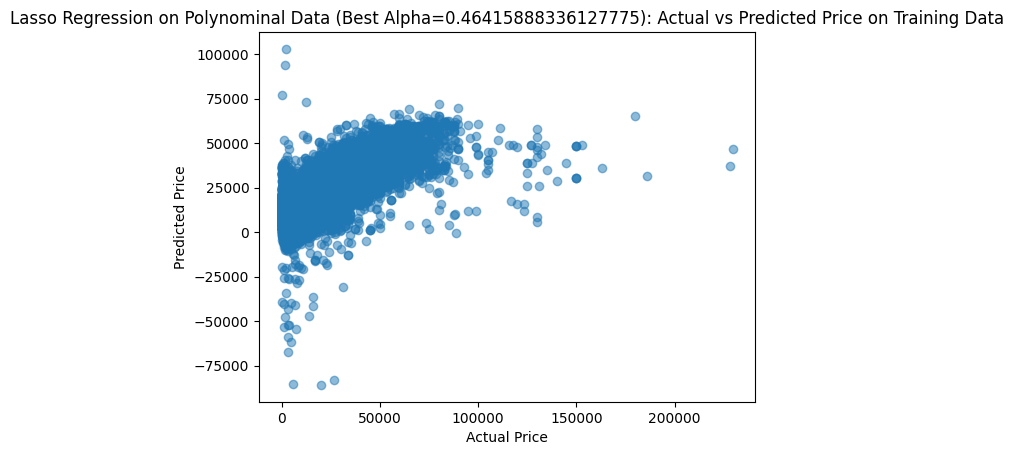

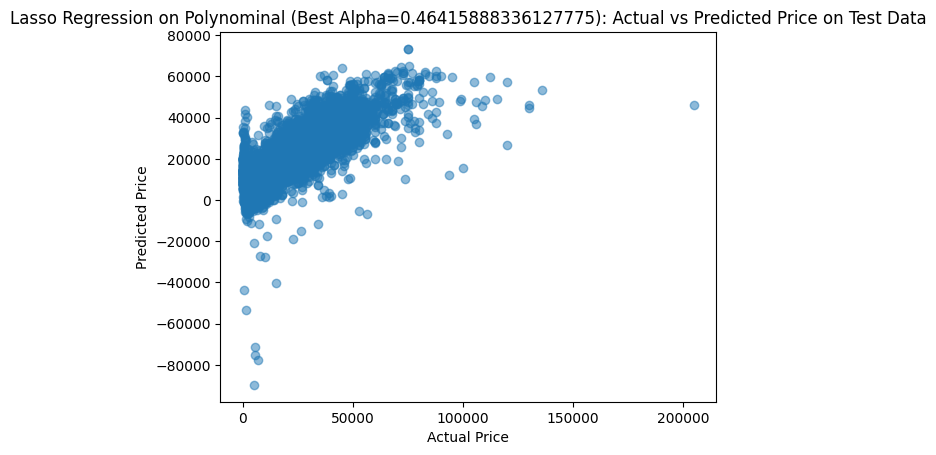

In [43]:
lasso = Lasso()

# Tune Alpha Using GridSearchCV
alpha_values = np.logspace(-3, 3, 10)  # Try alphas from 0.001 to 1000
param_grid = {'alpha': alpha_values}

grid_search = GridSearchCV(lasso, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train_sfa, y_train)

# Get the best alpha
best_alpha = grid_search.best_params_['alpha']
print(f"Best Alpha: {best_alpha}")

# Step 8: Train Lasso Model with Best Alpha
lasso_best = Lasso(alpha=best_alpha)
lasso_best.fit(X_train_sfa, y_train)

# Step 9: Make predictions
y_pred_train = lasso_best.predict(X_train_sfa)
y_pred = lasso_best.predict(X_test_sfa)

# Step 10: Evaluate Model Performance
mse_train = mean_squared_error(y_train, y_pred_train)
mse = mean_squared_error(y_test, y_pred)

print(f"Training data Mean Squared Error with best alpha: {mse_train:.2f}")
print(f"Testing data Mean Squared Error with best alpha: {mse:.2f}")

# Step 11: Plot Actual vs Predicted Prices
plt.scatter(y_train, y_pred_train, alpha=0.5)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(f"Lasso Regression on Polynominal Data (Best Alpha={best_alpha}): Actual vs Predicted Price on Training Data")
plt.show()

plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(f"Lasso Regression on Polynominal (Best Alpha={best_alpha}): Actual vs Predicted Price on Test Data")
plt.show()

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

#### Findings

Firstly I cleaned that data as best I could, preserving 70% of the original data. I then used OHE technique to convert the categirical features into numerical. Except for the condition feature, which I ranked. I also combined US States into regions. All of this left me However, in order to be able to work with the data, I could only sample 20% of this data. 

However, in order to accomplish this model I did have to perform a PCA transformation to 80%. The models I tested were

1. Linear Regression
2. Polynominal on data PCA to 80% variance (Best model with order on 3)
3. Ridge Model on original data, and then Ridge model having done a SFA on the Polynominal Data PCA data
4. Lasso on original data, and then Lasso model having done a SFA on the Polynominal Data PCA data

WHile I have not done exhaustive modelling, it is clear that there is not much difference between the Linear, Ridge, and Lasso models on the data. And when I did Ridge and Lasso models on the Polynominal data, the results were not as good. The Mean Squared errors for all these models were

Simple Linear=65.712,815
Ridge Regression with Optimised Alpha=65,740,841
Ridge Regression with Optimised Alpha on the polynominal data=67,254,331
Lasso Regression with Optimised Alpha=65,667,587
Lasso Regression with Optimised Alpha on the polynominal data=67,253,241

The Polynominal Model showed some promise when degree was of order 2.

The Polynominal Model on training data=56,103,940
The Polynominal Model on testing data =58,209,825

So I think it is the most promising model to explore going forward, with a bigger sample size, and more feature selection, possibly without PCA. If I was to improve this model this is the model I would continue to work on.

FInally the Lasso models tells me that below are the 5 most signicant features. That might indicate to me that manufacturer and fuel type are the 2 most significant factore, but also the very highest end manufactured cars may be skewing the data, and I might consider taking them out of future models.

manufacturer_ferrari
manufacturer_aston-martin
fuel_hybrid              
fuel_gas                      
manufacturer_porsche          



### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.

Summary For Used Car Salespeople

Visualising the data, I can see that the 3 types of car that sell the most are SUV, Sedans and Pickups, so one might consider alligning your stocks to just those 3 types. Interestingly, whatever region you are in does not change that.

Having analysed the used car data we have available, I have puilt a model that has a MSE of 58,209,825. That has root means squared error of  $7,629. The average price of car is $17,954, the model's percentage error is approximately plus or minus 42.49%. THis is not a great model, so it needs a few more iterations at least to perform better.

The currrent model tells me that manufacturer and fuel type are the 2 most significant factors.


In [44]:
average_price = y_test.mean()
print(average_price)

17954.653460503792
